# Look at new river forcing files:

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap, cm
import pickle

%matplotlib inline

Load files:

In [4]:
folder = '/data/brogalla/ANHA4/RUNOFF/'

file_remapped    = nc.Dataset(folder+'FIX_ANHA4_Regul_HydroGFD_HBC_runoff_monthly_y2002.nc')
file_fixedland   = nc.Dataset(folder+'FixedLandRunoff_FIX_ANHA4_Regul_HydroGFD_HBC_runoff_monthly_y2002.nc')
runoff_remapped  = np.array(file_remapped.variables['runoff'])
runoff_fixedland = np.array(file_fixedland.variables['runoff'])

In [6]:
print(np.amax(runoff_remapped), np.average(runoff_remapped), runoff_remapped.shape)

0.7510068 7.868447e-06 (12, 2400, 1632)


In [7]:
mesh       = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])

Plot new river runoff forcing:

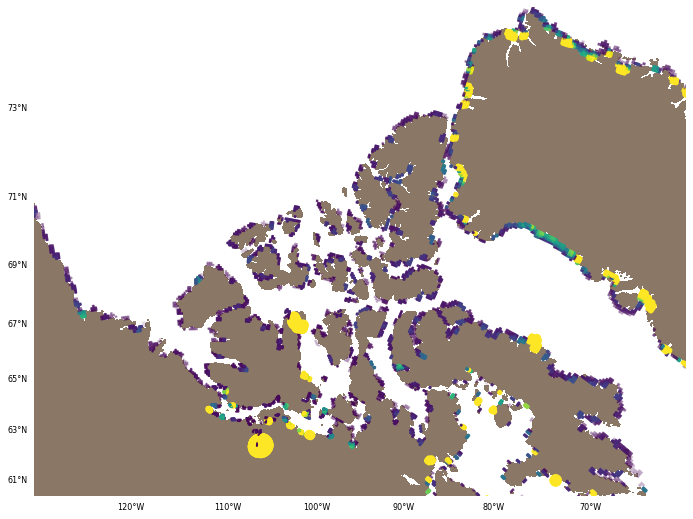

In [33]:
month=6

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-zoom.pickle','rb'))

x, y = proj1(mesh_lon, mesh_lat) 

runoff = np.ma.masked_where((runoff_remapped[month,:,:] <= 0), runoff_remapped[month,:,:])

proj1.scatter(x, y, c=runoff, s=runoff*5e3, alpha=0.8, zorder=3, vmin=0, vmax=1e-3)

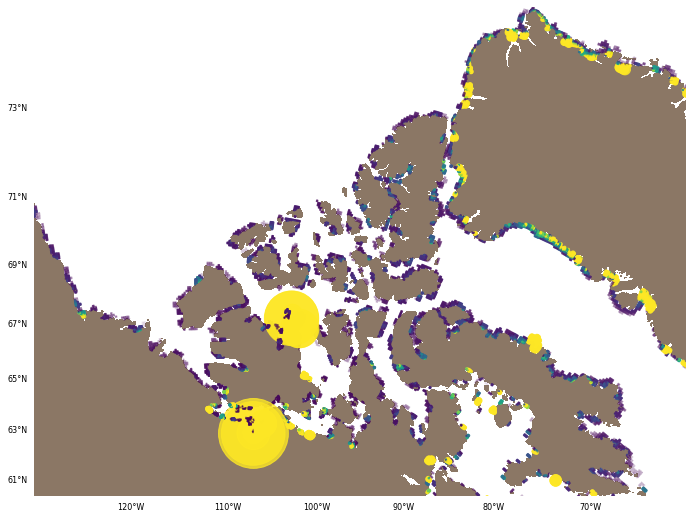

In [34]:
month=6

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-zoom.pickle','rb'))

x, y = proj1(mesh_lon, mesh_lat) 

runoff = np.ma.masked_where((runoff_fixedland[month,:,:] <= 0), runoff_fixedland[month,:,:])

proj1.scatter(x, y, c=runoff, s=runoff*5e3, alpha=0.8, zorder=3, vmin=0, vmax=1e-3)